# Homework 3

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cluster, silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

### Load Data

In [3]:
data = loadarff('../data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Normalization

In [4]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Purity score

In [5]:
def purity_score(y_true, y_pred):
    confusion_matrix = cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

### K-means

In [6]:
y_pred = []
for seed in [2, 1, 0]:
    kmeans = KMeans(n_clusters=3, random_state=seed).fit(X)
    y_pred = kmeans.labels_
    print(seed, 'Silhouette:', round(silhouette_score(X, y_pred), 4))
    print(seed, 'Purity:', round(purity_score(y, y_pred), 4))

2 Silhouette: 0.1136
2 Purity: 0.7672
1 Silhouette: 0.114
1 Purity: 0.7632
0 Silhouette: 0.1136
0 Purity: 0.7672


### Feature Selection

In [7]:
variances = VarianceThreshold().fit(X).variances_
variances.sort()
selector = VarianceThreshold(threshold=variances[-3]).fit(X)
X_new = pd.DataFrame(selector.transform(X), columns=X.columns[selector.get_support()])

### Plot

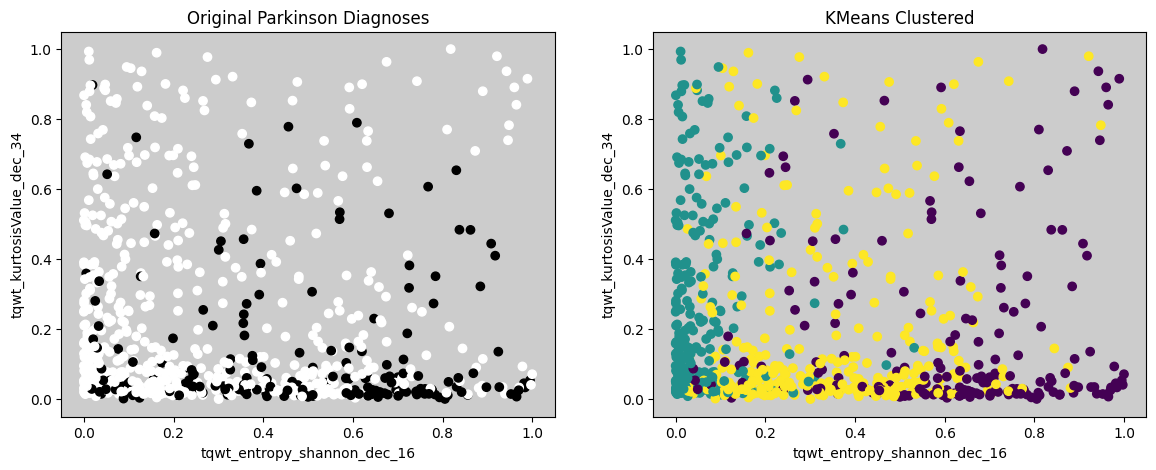

In [8]:
fig, axes = plt.subplot_mosaic("AB")
fig.set_size_inches(14, 5)
axes['A'].scatter(X_new.iloc[:,0], X_new.iloc[:,1], c=y)
axes['A'].set_title('Original Parkinson Diagnoses')
axes['A'].set_xlabel(X_new.columns[0])
axes['A'].set_ylabel(X_new.columns[1])
axes['A'].set_facecolor('#CCCCCC')
axes['B'].scatter(X_new.iloc[:,0], X_new.iloc[:,1], c=y_pred)
axes['B'].set_title('KMeans Clustered')
axes['B'].set_xlabel(X_new.columns[0])
axes['B'].set_ylabel(X_new.columns[1])
axes['B'].set_facecolor('#CCCCCC')
plt.show()

### PCA

In [9]:
components = 0
total_variance = 0
while(total_variance <= 0.8):
    components += 1
    pca = PCA(n_components=components).fit(X)
    total_variance = np.sum(pca.explained_variance_ratio_)
print('# Components =', components)

# Components = 31
